Ví dụ minh họa việc sử dụng phân cụm (clustering ) để thực hiện phân đoạn hình ảnh (image segmentation). Sử dụng thuật toán k-means.


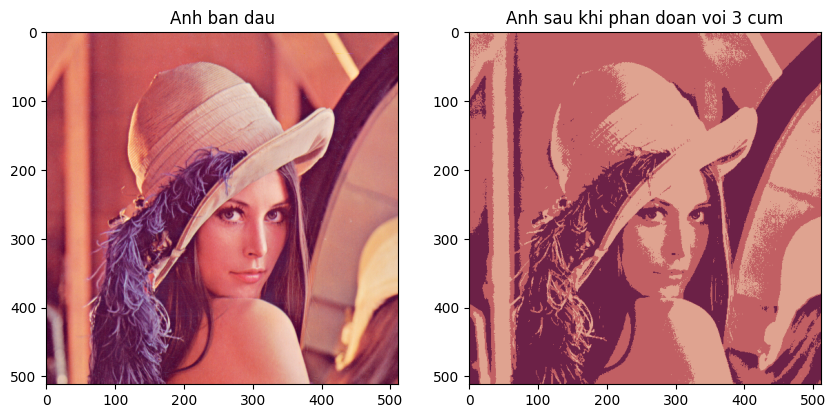

In [3]:
# Sinh viên có thể dùng module cv2 hoặc các module khác để xử lý file ảnh
# Để dùng cv2, nếu chưa cài đặt OpenCV, các em cần cài đặt opencv-python
# Có thể cần update pip, gõ lệnh: python.exe -m pip install --upgrade pip
# Cài đặt OpenCV thông qua pip, gõ lệnh: pip install opencv-python
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load file hình ảnh (ví dụ: file ảnh 'lenna.png' chứa cùng chung trong thư mục)
image = cv2.imread('lenna.png')
# Chuyển tử BGR (OpenCV) sang RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  

# Định dạng ảnh thành một mảng 2D chứa các pixel (width * height, 3)
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Chọn số lượng cụm (clusters)
K = 3
kmeans = KMeans(n_clusters=K, random_state=0)

# Áp dụng K-means clustering cho giá trị các pixel
kmeans.fit(pixel_values)

# Thay thế giá trị mỗi pixel bằng giá trị trung tâm của cụm tương ứng
segmented_image = kmeans.cluster_centers_[kmeans.labels_]
segmented_image = segmented_image.reshape(image.shape)

# Chuyển hình ảnh đã phân đoạn trở lại unit8
segmented_image = np.uint8(segmented_image)

# Hiện thị ảnh ban đầu và ảnh sau khi phân đoạn để so sánh
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Anh ban dau')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title(f'Anh sau khi phan doan voi {K} cum')

plt.show()
